Беляева Любовь Андреевна 19-ИВТ-2 6-вариант

Лабораторная работа №4

1.Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных.

"mpg"-потребление топлива;
"cylinders"-количество цилиндров;
"displacement"-литраж;
"horsepower"-мощность;
"weight"-вес;
"acceleration"-ускорение;
"model_year"-год выпуска;
"origin"-место производства;
"car_name"-название модели;

2.Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [3]:
import numpy as np 
import pandas as pd
%matplotlib inline

In [4]:
df = pd.read_csv('auto-mpg.data.csv', sep='\s+', names=["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year", "origin","car_name"])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.horsepower = df.horsepower.apply(lambda x: float(x) if x!='?' else None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [7]:
df.shape

(398, 9)

In [8]:
df.drop_duplicates()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [9]:
df = df.drop_duplicates() #удаление дубликатов
df = df.dropna().reset_index(drop=True)
print('dataset size: ', df.shape)

dataset size:  (392, 9)


3.Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

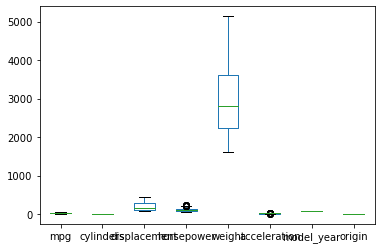

In [10]:
import seaborn as sns
df.plot.box();

In [11]:
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']
categorial:  ['car_name']


In [12]:
#нормализация количественных признаков
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,chevrolet chevelle malibu
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,buick skylark 320
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,plymouth satellite
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,amc rebel sst
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,ford torino


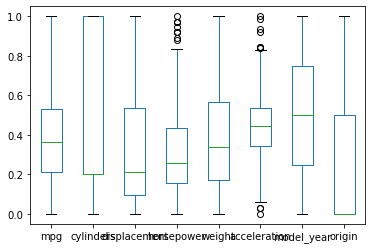

In [13]:
df.plot.box();

5.Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [14]:
#df.nunique()

In [15]:
#for i in categorial_columns:
    #print(i,': ', df[i].unique())

In [16]:
categorical_attributes = [column for column in df.columns if df[column].dtype.name == 'object']
print(categorical_attributes)
df = df.drop(categorical_attributes, axis=1)

['car_name']


5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;

<AxesSubplot:>

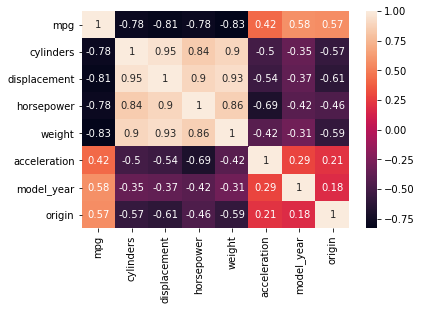

In [17]:
sns.heatmap(df.corr(),annot=True)#функция для отображения коэффициента корреляции

6.Заполните пропущенные значения в данных;

In [18]:
df.isnull()#отсутствие данных

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
387,False,False,False,False,False,False,False,False
388,False,False,False,False,False,False,False,False
389,False,False,False,False,False,False,False,False
390,False,False,False,False,False,False,False,False


In [19]:
df.shape

(392, 8)

In [20]:
df.count()#пропусков нет

mpg             392
cylinders       392
displacement    392
horsepower      392
weight          392
acceleration    392
model_year      392
origin          392
dtype: int64

7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

In [21]:
import numpy as np
import sklearn as skl
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
%matplotlib inline
import matplotlib.pyplot as plt

In [30]:
# разделим полученные данные на данные для обучения и теста
X = df.drop(['mpg'], axis=1)#признаки
Y = df['mpg']#классы
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)#обучающиая выборка и тестовые выборки
#print(X_train.shape)
#print(X_test.shape

Линейная регрессия без использования регуляризаторов

In [23]:
#regr = linear_model.LinearRegression()
#regr.fit(X_train,y_train)
#pred_regr = regr.predict(X_test)
#print(pred_regr[:15] - y_test[:15])

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)
reg_predic = reg.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr, spearmanr
print('Error = %8.5f' %mean_squared_error(reg_predic, Y_test))#погрешность
#print('Mean Absolute Error = %8.5f' %mean_absolute_error(reg_predic, Y_test))
#print()

print('Pearson correl: %8.6f' %pearsonr(reg_predic, Y_test)[0])#корреляция по Пирсону
print('p-value:', pearsonr(reg_predic, Y_test)[1])
#print()
print('Spearman rank correl: %8.6f' %spearmanr(reg_predic, Y_test)[0])#по Спирмену
print('p-value:', spearmanr(reg_predic, Y_test)[1])

Error =  0.00787
Pearson correl: 0.908108
p-value: 1.1348628002570358e-45
Spearman rank correl: 0.941125
p-value: 1.8099987302190511e-56


Линейная регрессия, LASSO регуляризатор

In [27]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
lasso = LassoCV(alphas=np.arange(0.001, 10, 0.05), n_jobs=-1)
lasso.fit(X_train, Y_train)
print('Best alpha:', lasso.alpha_)
lasso_pred = lasso.predict(X_test)

Best alpha: 0.001


In [34]:
print('Error = %8.5f' %mean_squared_error(lasso_pred, Y_test))
print('Pearson correl: %8.6f' %pearsonr(lasso_pred, Y_test)[0])#корреляция по Пирсону
print('p-value:', pearsonr(lasso_pred, Y_test)[1])
print('Spearman correl: %8.6f' %spearmanr(lasso_pred, Y_test)[0])#по Спирмену
print('p-value:', spearmanr(lasso_pred, Y_test)[1])

Error =  0.00826
Pearson correl: 0.903818
p-value: 1.4110519195047727e-44
Spearman correl: 0.937965
p-value: 3.4284554312759305e-55
